In [1]:
## Path for modules

import sys

import numpy as np
import xarray as xr

from netCDF4 import Dataset

sys.path.insert(0,"/mnt/meom/workdir/henelle/Notebooks/git/xscale")
import xscale
import xscale.spectral.fft as xfft

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import numpy.ma as ma

sys.path.insert(0,"/mnt/meom/workdir/henelle/Notebooks/git/")
import myfunctions as mf

import matplotlib.cm as mplcm
import matplotlib.colors as colors
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from datetime import date, datetime
from xhistogram.xarray import histogram

import pandas as pd

%matplotlib inline

In [2]:
season = 'JFM'

In [3]:
dirvarT0     = '/mnt/meom/workdir/alberta/eNATL60/eNATL60-BLBT02-S/1h/ACO/'
#curlfileT0   = dirvarT0 + 'eNATL60ACO-BLBT02_y2009m07-09_socurloverf10m_filt2T.nc' # JAS
#strainfileT0 = dirvarT0 + 'eNATL60ACO-BLBT02_y2009m07-09_sostrainoverf10m_filt2T.nc' # JAS

curlfileT0   = dirvarT0 + 'eNATL60ACO-BLBT02_y2010m01-03_socurloverf10m_filt2T.nc' # JFM
strainfileT0 = dirvarT0 + 'eNATL60ACO-BLBT02_y2010m01-03_sostrainoverf10m_filt2T.nc' # JFM

dscurlT0   = xr.open_dataset(curlfileT0)
dsstrainT0 = xr.open_dataset(strainfileT0)

#curlT0   = dscurlT0.Curl_Tide_Filt[45,:,:] # JAS
curlT0   = dscurlT0.curl_Tide_Filt[45,:,:] # JFM
strainT0 = dsstrainT0.strain_Tide_Filt[45,:,:]

curlT0.shape

(1191, 781)

In [4]:
# Opening grid files

dirgrid = '/mnt/meom/workdir/alberta/eNATL60/eNATL60-I/'
gridfile = dirgrid+'mesh_hgr_eNATL60ACO_3.6.nc'
dsgrid = xr.open_dataset(gridfile,chunks={'x':200,'y':200})

lon = dsgrid.nav_lon
lat = dsgrid.nav_lat
lon.shape

(1191, 781)

In [5]:
lonmin, lonmax, latmin, latmax = -31,-28,30.6,33.6 # region A3
#lonmin, lonmax, latmin, latmax = -31,-28,31.6,34.6 # region A1
#lonmin, lonmax, latmin, latmax = -31,-28,33,36 # region B
#lonmin, lonmax, latmin, latmax = -30,-27,30.6,33.6 # region A2
#lonmin, lonmax, latmin, latmax = -35.0,-32.5,35.4,39.0 # region C
#lonmin, lonmax, latmin, latmax = -34.0,-31.5,25.2,28.8 # region D

region = 'A3'

In [6]:
!pwd

/mnt/meom/workdir/henelle/Notebooks/HISTOGRAMS


In [7]:
!ls hist_curl00_filtboxA3.npz

hist_curl00_filtboxA3.npz


In [8]:
file_hist_strain00 = np.load('hist_strain00_norm2'+region+season+'.npz')
file_hist_strainT0 = np.load('hist_strainT0_norm2'+region+season+'.npz')
file_hist_curl00   = np.load('hist_curl00_norm2'+region+season+'.npz')
file_hist_curlT0   = np.load('hist_curlT0_norm2'+region+season+'.npz')

In [9]:
hist_strain00_norm2 = file_hist_strain00['hist_strain00_norm2']
hist_strainT0_norm2 = file_hist_strainT0['hist_strainT0_norm2']
hist_curl00_norm2   = file_hist_curl00  ['hist_curl00_norm2']
hist_curlT0_norm2   = file_hist_curlT0  ['hist_curlT0_norm2']

In [10]:
file_bin_strain00 = np.load('hist_strain00_bin'+region+season+'.npz')
file_bin_strainT0 = np.load('hist_strainT0_bin'+region+season+'.npz')
file_bin_curl00   = np.load('hist_curl00_bin'+region+season+'.npz')
file_bin_curlT0   = np.load('hist_curlT0_bin'+region+season+'.npz')

In [11]:
bin_strain00 = file_bin_strain00['hist_strain00_bin']
bin_strainT0 = file_bin_strainT0['hist_strainT0_bin']
bin_curl00   = file_bin_curl00  ['hist_curl00_bin']
bin_curlT0   = file_bin_curlT0  ['hist_curlT0_bin']

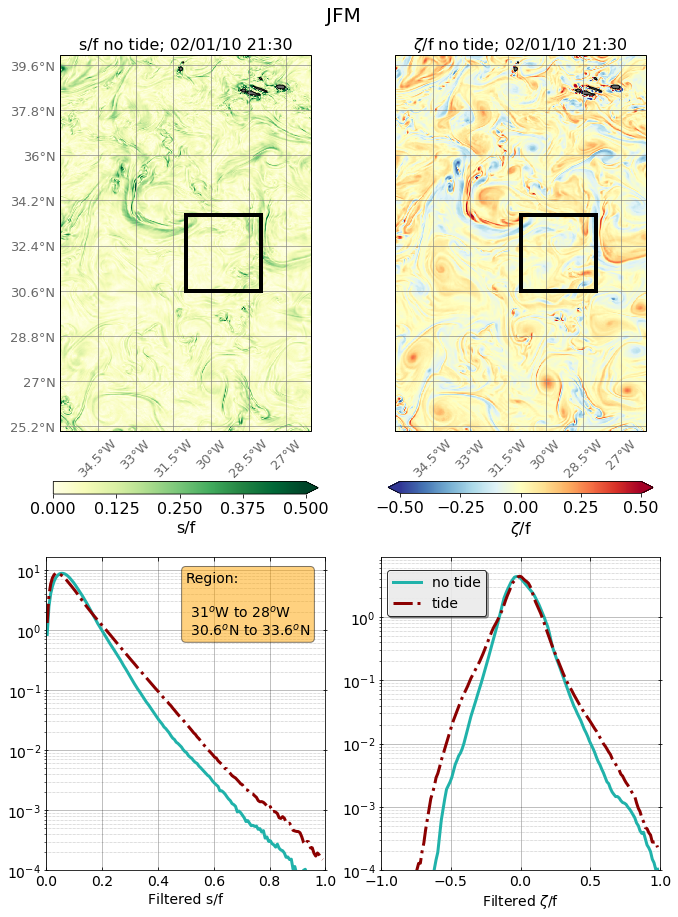

In [12]:
mf.histogram_norm_sfc(strainT0,curlT0,
                      bin_strain00,
                      bin_curl00,
                      hist_strain00_norm2,
                      hist_strainT0_norm2,
                      hist_curl00_norm2,
                      hist_curlT0_norm2,
                      lon,lat,lonmin,lonmax,latmin,latmax,
                      vmin_data1=0,vmax_data1=0.5,vmin_data2=-0.5,vmax_data2=0.5,
                      cmap_data1='YlGn',cmap_data2='RdYlBu_r',
                      var_title_data1='s/f',var_title_data2='$\zeta$/f',
                      date=str(strainT0.time_counter.values),
                      season='JFM')